# Gradient Descent without Partial Derivatives

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import metrics


import math

#### Step 1: Make a random data set

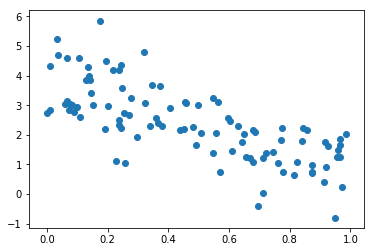

In [2]:
np.random.seed(13)
xrand = np.random.rand(100)
yrand = 4 + -3 * xrand + np.random.randn(100)
plt.scatter(xrand, yrand)


#### Step 2: Lets write our own GDRegression class

In [11]:
class GDRegression:
    """
    Implement a very simple very naive GD regression algorithm.  No calculus required -- just patience (maybe)
    """
    def __init__(self, learn_rate=0.1):
        self.theta_best = np.random.rand(2)
        self.lr = learn_rate
        
    def predict(self,X):
        X_new_b = np.c_[np.ones((100,1)),X]
        pp = X_new_b.dot(self.theta_best)
        return pp

    def score(self, X, y):
        return np.mean(np.sum(np.square(self.predict(X)-y)))
    
    def fit(self, X, y, n=1000):
        res = self.predict(X)
        minmse = 9.99e25
        for i in range(n):
            for i in range(len(self.theta_best)):
                base = self.score(X, y)
                savetb = self.theta_best[i]
                self.theta_best[i] = savetb + self.lr
                s1 = self.score(X, y)
                self.theta_best[i] = savetb - self.lr
                s2 = self.score(X, y)
                self.theta_best[i] = savetb
                #print(base, s1, s2)
                if s1 < base and s1 < s2:
                    self.theta_best[i] = savetb + self.lr
                elif s2 < base and s2 <= s1:
                    self.theta_best[i] = savetb - self.lr
                        
                #print(self.score(X,y))
    
lr = GDRegression(0.05)



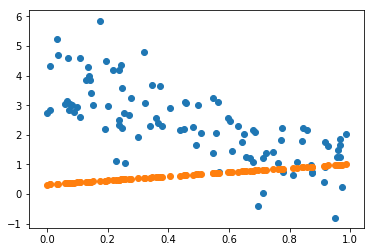

In [12]:
plt.scatter(xrand, yrand)
plt.scatter(xrand, lr.predict(xrand))

[0.37173941 0.74531372]


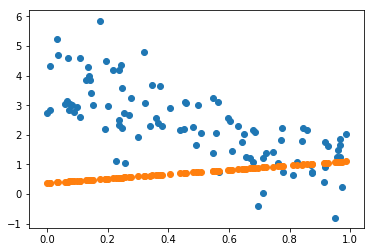

In [13]:
lr.fit(xrand, yrand, 1)
print(lr.theta_best)
plt.scatter(xrand, yrand)
plt.scatter(xrand, lr.predict(xrand))

[0.87173941 1.24531372]


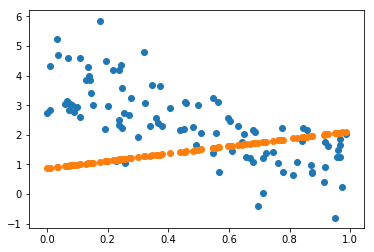

In [14]:
lr.fit(xrand,yrand,10)
print(lr.theta_best)
plt.scatter(xrand, yrand)
plt.scatter(xrand, lr.predict(xrand))

[ 2.67173941 -0.65468628]


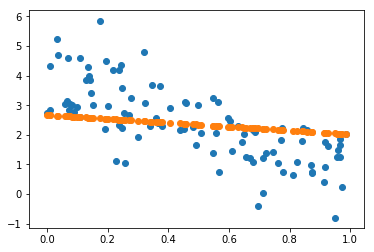

In [15]:
lr.fit(xrand,yrand,40)
print(lr.theta_best)
plt.scatter(xrand, yrand)
plt.scatter(xrand, lr.predict(xrand))

[ 3.77173941 -2.95468628]


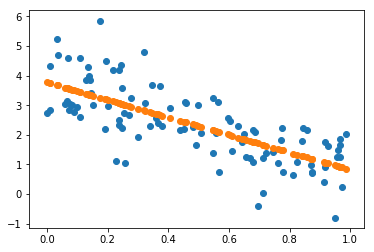

In [16]:
lr.fit(xrand,yrand,50)
print(lr.theta_best)
plt.scatter(xrand, yrand)
plt.scatter(xrand, lr.predict(xrand))

[ 3.77173941 -2.95468628]


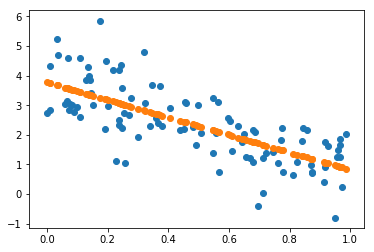

In [17]:
#lr.lr = 0.0001
lr.fit(xrand,yrand,900)
print(lr.theta_best)
plt.scatter(xrand, yrand)
plt.scatter(xrand, lr.predict(xrand))

In [18]:
lr.theta_best

array([ 3.77173941, -2.95468628])

In [19]:
X_b = np.c_[np.ones((100,1)),xrand]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(yrand)
theta_best

array([ 3.82894841, -3.04287621])